# header

In [4]:
%run Z:/Documents/M_drive_docs/JUPYTER/NOTE_BOOKS/tools/header.py
%matplotlib notebook
%matplotlib notebook

hsize=cm2inch(12)*2
vsize=(1.42*hsize)
figuresize=hsize,vsize
print()
print('FIGURE SIZE: ',figuresize[0],' x ',figuresize[1],'in')
print()

plt.rcParams['axes.linewidth'] = 0.07*hsize
plt.rcParams['ytick.labelsize'] = hsize*1.4
plt.rcParams['ytick.major.width'] = 0.07*hsize
plt.rcParams['ytick.major.size'] = 0.35*hsize
plt.rcParams['ytick.minor.width'] = 0.07*hsize
plt.rcParams['ytick.minor.size'] = 0.18*hsize
plt.rcParams['xtick.labelsize'] = hsize*1.4
plt.rcParams['xtick.major.width'] = 0.07*hsize
plt.rcParams['xtick.major.size'] = 0.35*hsize
plt.rcParams['xtick.minor.width'] = 0.07*hsize
plt.rcParams['xtick.minor.size'] = 0.18*hsize
plt.rcParams['axes.labelsize'] =1.6*hsize
plt.rcParams['axes.labelpad'] =0.1*hsize


from impedance.circuits import CustomCircuit



FIGURE SIZE:  9.448818897637794  x  13.417322834645667 in



# Simulation

<IPython.core.display.Javascript object>


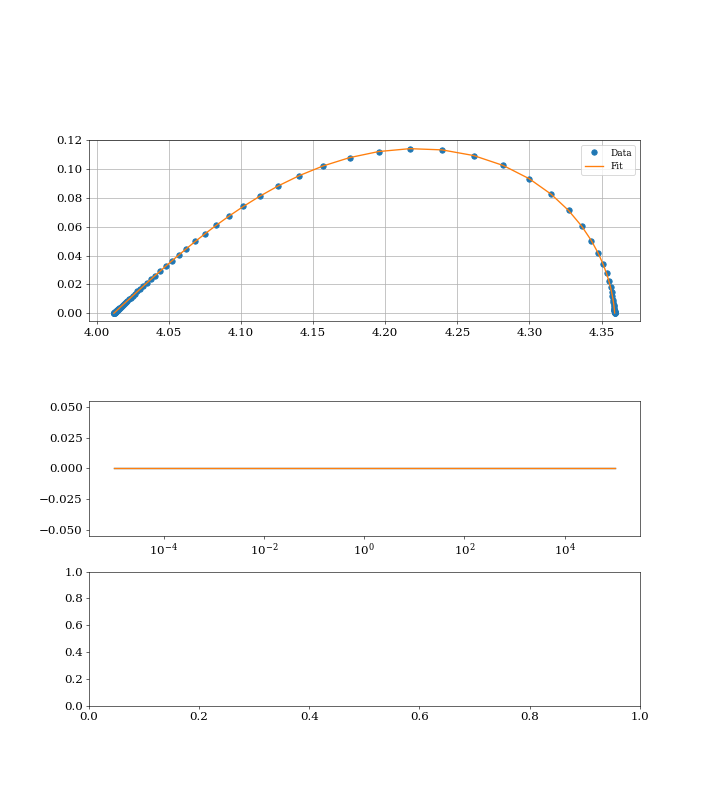

Simulating circuit based on initial parameters

-------------------------------
Circuit: None
Circuit string: R0-V1
Fit: False

-------------------------------
Initial guesses:
	R0 = 4.00e+00
	V1_0 = 5.00e+00
	V1_1 = 2.00e+00
	V1_2 = 3.00e+00
	V1_3 = 5.00e-01
	V1_4 = 5.00e-01
	V1_5 = 1.00e-06
	V1_6 = 1.00e-06
	V1_7 = 3.00e-02
	V1_8 = 3.00e+00
	V1_9 = 2.98e+02
	V1_10 = 5.00e+01
	V1_11 = 5.00e-03
	V1_12 = 9.50e-01
	V1_13 = 5.00e-04
	V1_14 = 1.80e-01



In [5]:
hsize=cm2inch(14)*2
vsize=(1.42*hsize)/1.25
figuresize=hsize,vsize
fig,ax=plt.subplots(1,1, figsize=(figuresize))

gs = gridspec.GridSpec(3, 2,
                       width_ratios=[1,1],
                       height_ratios=[1,0.5,0.5],
                       wspace=0.25
                      )
#ring_disk=plt.subplot(gs[0,1:12])
ax=plt.subplot(gs[0:2])
ax1=plt.subplot(gs[1,0:2])
ax2=plt.subplot(gs[2,0:2])

#circuit = 'R0-p(R1,E1/E2)-p(R2-W1/W2,E3/E4)'
#initial_guess = [.015, .005, 100,0.7, 0.04, .05, 100, 0.1,0.7]
circuit = 'R0-p(R1,E1/E2)-p(R2,E3/E4)'
initial_guess = [.015, .005, 0.1,0.99,.0085, 0.0055,0.99]
circuit = 'R0-R1-G1-C0'
initial_guess = [.015,0.5,10,2,2]

circuit = 'R0-V1'
initial_guess=[4,5, 2, 3, 0.5, 0.5, 1e-06, 1e-06, 0.03, 3, 298, 50, 0.005, 0.95, 0.0005, 0.18]

frequencies=np.logspace(-5,5,100)
circuit = CustomCircuit(circuit, initial_guess=initial_guess)
#circuit.fit(frequencies, Z)
Z = circuit.predict(frequencies)
print(circuit)
Z_fit=Z
ax.grid()
ax.set_aspect(  'equal')

#plot_nyquist(ax, frequencies, Z, fmt='o')
#plot_nyquist(ax, frequencies, Z_fit, fmt='-')
ax.plot(Z.real,-Z.imag, linewidth=0,marker='o')
ax.plot(Z_fit.real,-Z_fit.imag)

res_meas_real = (Z - Z_fit).real/np.abs(Z)*100
res_meas_imag = (Z - Z_fit).imag/np.abs(Z)*100

ax1.plot(frequencies,res_meas_real)
ax1.plot(frequencies,res_meas_imag)
ax1.set_xscale('log')

ax.legend(['Data', 'Fit'])


# Fitting

## function builder

In [6]:



def builder(dic,dic_bou={}):
    '''The function returns a list of parameters and a list of bounds which are the ones 
    indicated by the True in the dic_bou dictionary'''
    import numpy as np
    dic_bul,lb,ub,initial={},[],[],[]
    for i in dic.keys():
        initial.append(dic[i])
        try:
            dic_bul[i]=dic_bou[i]
            lb.append(1e-9)
            ub.append(1e5)

        except KeyError:
            lb.append(0.999999995*dic[i])
            ub.append(1.000000005*dic[i])
            dic_bul[i]=False
    #bul=(np.asarray(lb),np.asarray(ub))
    bul=(lb,ub)
    return initial,bul


#
PEIS_dict={'A':5, # (cm2) geometrical area 
           'b':2, #thickness of the electrode
           'C_dl':3, #double layer capacitance of the CT reaction
           'c_o': 0.5, #concentration of the oxidised species
           'c_r':0.5, #concentration of the reduced species
           'D_o':1e-6, #diffusion coefficient of the oxidised species
           'D_r':1e-6, #diffusion coefficient of the reduced species
           'rho_e':0.03, # (Ohm cm) resistivity of the elctronic conducting phase
           'rho_i':3, # (Ohm cm) resistivity of the ionic conducting phase
           'T': 298, # (K) temperature 
           'A_t': 50, #(cm2) effective electrochemical area
           'i_0':0.005, #(A cm-2) exchange current for a differential element 
           'q':0.95, # (dimensionless) exponent of CPE
           'a':0.0005,#(cm) Nernst diffusion layer
           'f':0.18, #(dimensionless) geometric scale factor
           } 
ref={'A_t':True,'i_0':True,'q':True,'f':True}          
initial_guess,bounds=builder(PEIS_dict,dic_bou=ref)
add=[1e-9,5]
initial_guess=add+initial_guess

el,eu=[0,0],[np.inf,np.inf]
bounds=(el+bounds[0],eu+bounds[1])



## fitting

[1.0002226e+04 8.0805347e+03 6.3960181e+03 4.9534141e+03 3.9187446e+03
 3.1009912e+03 2.4542139e+03 1.9418672e+03 1.5364736e+03 1.2153909e+03
 9.6154211e+02 7.6072662e+02 6.0211945e+02 4.7637225e+02 3.7705078e+02
 2.9818713e+02 2.3598149e+02 1.8673315e+02 1.4777780e+02 1.1690781e+02
 9.2516098e+01 7.3196739e+01 5.7906136e+01 4.5806171e+01 3.6240891e+01
 2.8687269e+01 2.2684410e+01 1.7959774e+01 1.4204532e+01 1.1240989e+01
 8.8980799e+00 7.0382657e+00 5.5704117e+00 4.4038892e+00 3.4877212e+00
 2.7586520e+00 2.1822603e+00 1.7265230e+00 1.3658181e+00 1.0813177e+00
 8.5522979e-01 6.7684650e-01 5.3561628e-01 4.2400509e-01 3.3540875e-01
 2.6516318e-01 2.0987839e-01 1.6599745e-01 1.3145357e-01 1.0400563e-01
 8.2280487e-02 6.5112337e-02 5.1486120e-02 4.0736273e-02 3.2234788e-02
 2.5525466e-02 2.0192638e-02 1.5964657e-02 1.2641028e-02]
øøø


<IPython.core.display.Javascript object>


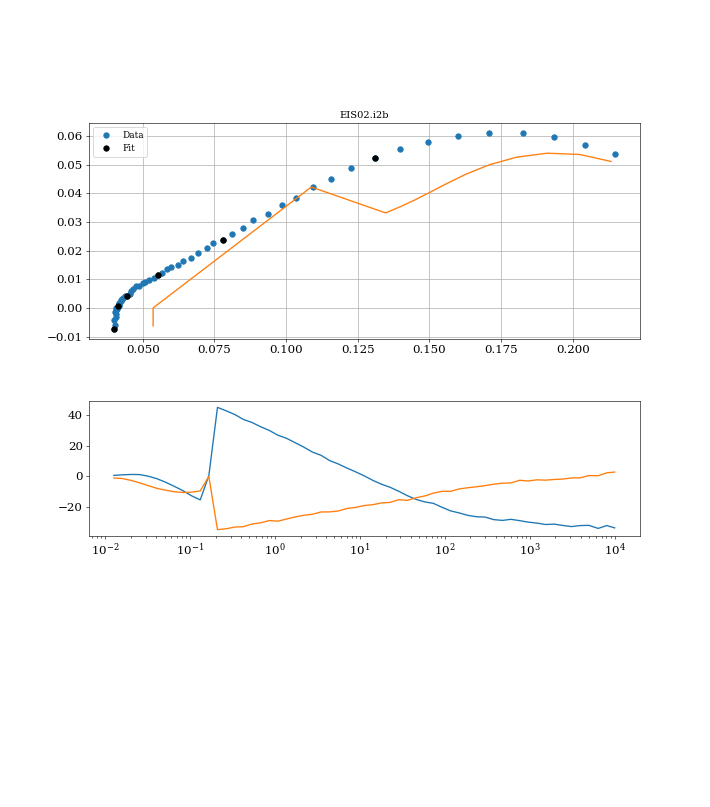

C:\Users\au630261\AppData\Local\Continuum\anaconda3\envs\EIS_env\lib\site-packages\impedance\circuit_elements.py:272: RuntimeWarning:

overflow encountered in power

C:\Users\au630261\AppData\Local\Continuum\anaconda3\envs\EIS_env\lib\site-packages\impedance\circuit_elements.py:272: RuntimeWarning:

invalid value encountered in multiply

C:\Users\au630261\AppData\Local\Continuum\anaconda3\envs\EIS_env\lib\site-packages\impedance\circuit_elements.py:272: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\au630261\AppData\Local\Continuum\anaconda3\envs\EIS_env\lib\site-packages\impedance\circuit_elements.py:275: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\au630261\AppData\Local\Continuum\anaconda3\envs\EIS_env\lib\site-packages\impedance\circuit_elements.py:293: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\au630261\AppData\Local\Continuum\anaconda3\envs\EIS_env\lib\site-packages\impedance\circuit_elements.py:294: RuntimeWarn


-------------------------------
Circuit: None
Circuit string: L0-R0-V1
Fit: True

-------------------------------
Fit parameters:
	L0 = 9.91e-08 +/- 1.58e-07
	R0 = 4.11e-06 +/- 1.39e+06
	V1_0 = 1.55e+02 +/- 1.85e+05
	V1_1 = 5.50e+01 +/- 5.75e+05
	V1_2 = 1.48e+01 +/- 5.58e+05
	V1_3 = 5.09e-05 +/- 9.53e+01
	V1_4 = 5.83e-01 +/- 1.12e+06
	V1_5 = 9.71e-02 +/- 4.95e+05
	V1_6 = 1.66e-01 +/- 8.54e+05
	V1_7 = 1.51e-01 +/- 3.91e+06
	V1_8 = 1.70e+02 +/- 2.06e+05
	V1_9 = 2.88e+01 +/- 7.73e+05
	V1_10 = 4.01e+01 +/- 7.30e+05
	V1_11 = 4.63e+01 +/- 5.14e+05
	V1_12 = 5.73e+01 +/- 9.41e+01
	V1_13 = 1.76e+00 +/- 4.49e+06
	V1_14 = 3.53e-01 +/- 1.06e+06



9.908546193705707e-08

In [7]:
folder='Z:/Documents/AUdata/FullCell/AQDS05-_FeCN6_/T9/190514_T9_06_EIS/'
file='EIS02.i2b'
#for file in list_files1(folder,'i2b'):
a=pd.read_csv(folder+file,delimiter=' ',names=['freq','real','imag'])
freq,real,imag=a['freq'],a['real'],a['imag']
mask=False
if mask:
    mask=a['imag']<=0
    freq=a['freq'][mask].tolist()
    real=a['real'][mask].tolist()
    imag=a['imag'][mask].tolist()
    
Z=np.asarray([np.complex(real[i],imag[i]) for i in np.arange(len(freq))])
frequencies=np.asarray(freq)

print(frequencies)
print('øøø')

hsize=cm2inch(14)*2
vsize=(1.42*hsize)/1.25
figuresize=hsize,vsize
fig,ax=plt.subplots(1,1, figsize=(figuresize))

gs = gridspec.GridSpec(3, 2,
                       width_ratios=[1,1],
                       height_ratios=[1,0.5,0.5],
                       wspace=0.25
                      )
#ring_disk=plt.subplot(gs[0,1:12])
ax=plt.subplot(gs[0:2])
ax1=plt.subplot(gs[1,0:2])
#ax2=plt.subplot(gs[2,0:2])

#circuit = 'R0-p(R1,C1)-p(R2,C2)'
circuit = 'L0-R0-p(R1,C1)-G1/G2'
initial_guess = [.015, .005, 1000, .05, 10]
circuit = 'L0-R0-p(R1,E1)-p(R2,E3)'
initial_guess = [1e-7,4.01e-02, 1.84e-01, 1.87e+01, 7.09e-01, 4.99e-02,5.65e+00,5.30e-01]
circuit = 'L0-R0-V1'
initial_guess=[1e-9,4,5, 2, 3, 0.5, 0.5, 1e-06, 1e-06, 0.03, 0.33, 298, 50, 0.005, 0.95, 0.0005, 0.18]
#R0 = 4.01e-02
#	R1 = 1.84e-01
#	E1 = 1.87e+01
#	E2 = 7.09e-01
#	R2 = 4.99e-02
#	E3 = 5.65e+00
#	E4 = 5.30e-01


#ref={'A_t':True,'i_0':True,'q':True,'f':True} 
ref={}
initial_guess,bounds=builder(PEIS_dict,dic_bou=ref)
add=[1e-9,5]
initial_guess=add+initial_guess

el,eu=[0,0],[np.inf,np.inf]
bounds=(el+bounds[0],eu+bounds[1])

circuit = CustomCircuit(circuit, initial_guess=initial_guess,bounds=bounds)
circuit.fit(frequencies, Z)
Z_fit = circuit.predict(frequencies)
print(circuit)

ax.grid()
ax.set_aspect(  'equal')

#plot_nyquist(ax, frequencies, Z, fmt='o')
#plot_nyquist(ax, frequencies, Z_fit, fmt='-')
ax.plot(Z.real,-Z.imag, linewidth=0,marker='o')
ax.plot(Z.real,-Z.imag, linewidth=0,marker='o',color='k',markevery=10)
ax.plot(Z_fit.real,-Z_fit.imag)

res_meas_real = (Z - Z_fit).real/np.abs(Z)*100
res_meas_imag = (Z - Z_fit).imag/np.abs(Z)*100

ax1.plot(frequencies,res_meas_real)
ax1.plot(frequencies,res_meas_imag)
ax1.set_xscale('log')
ax.set_title(file,fontsize=hsize)
ax.legend(['Data', 'Fit'])
circuit.parameters_[0]


### Functions from Doris

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator 

In [2]:
from impedance.circuits import CustomCircuit

no display found. Using non-interactive Agg backend


In [3]:
%matplotlib notebook

In [4]:
def plot_imp_fit(Z, Z_fit, fig_width = 5, fig_height = 5.4, text_size = 9):

    # Create the figure canvas and axes:  
    fig = plt.figure(figsize=(fig_width,fig_height))
    gs = gridspec.GridSpec(2, 1, height_ratios=[2,0.8])
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    # Plot the experimental data and model:
    ax1.plot(Z.real, -Z.imag, marker = "o", ms = 3, mfc = "w", color="black", label="Data", linestyle="")
    ax1.plot(Z_fit.real, -Z_fit.imag, color="red", label="Model", linestyle="-")
    ax1.set_aspect("equal")
    ax1.legend(loc="upper left", frameon=True, fontsize=text_size)
    ax1.set_xlabel("$Z_{\mathrm{real}}$ [$\Omega$]", fontsize=text_size)
    ax1.set_ylabel("$-Z_{\mathrm{imag}} $ [$\Omega$]", fontsize=text_size)
    #ax1.set_xlim(, )
    #ax1.set_ylim(, )
    
    # Calculate the fit residuals:
    res_real = (Z - Z_fit).real/np.abs(Z)*100
    res_imag = (Z - Z_fit).imag/np.abs(Z)*100

    # Plot the fit residuals:
    ax2.plot(frequencies, res_real, marker = "o", ms = 2, mfc = "w", color="red", label="Real", 
             linestyle="-", linewidth=0.7)
    ax2.plot(frequencies, res_imag, marker = "o", ms = 2, mfc = "w", color="blue", label="Imaginary", 
             linestyle="-", linewidth=0.7)
    ax2.axhline(y=0, color="gray", linestyle="--", linewidth=0.5)
    ax2.set_title("Model residuals", fontsize=text_size)
    ax2.set_xscale('log')
    ax2.legend(loc="upper left", frameon=True, fontsize=text_size)
    ax2.set_xlabel("Frequency [Hz]", fontsize=text_size)
    ax2.set_ylabel("Relative residuals [%]", fontsize=text_size)
    ax2.set_ylim(-5, 5)

    # Options for tick marks: 
    ax1.tick_params(which = "both", direction = "in", width=1.0, top=True, right=True, labelsize=text_size)
    ax1.xaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax1.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax2.tick_params(which = "both", direction = "in", width=1.0, top=True, right=True, labelsize=text_size)
    ax2.yaxis.set_minor_locator(AutoMinorLocator(n=2))

    # Change the linewidth of the plot borders:
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(1.2)
        ax2.spines[axis].set_linewidth(1.2)

    # Show and save the figure: 
    plt.tight_layout()
    #plt.savefig(save_fig_location, dpi=250)
    plt.show()

In [5]:
fname = "data/190117_014_GCAuI_GC_5mM_K3FeCN6_1M_Na2SO4_PEIS.txt"
data = pd.read_csv(fname, sep="\t", skiprows = 17, names=["f", "Zreal", "Zimag", "Z", "phase"])

In [6]:
frequencies = np.array(data["f"])
Z = np.array(data["Zreal"] + 1j*data["Zimag"])

In [7]:
initial_guess=[10, 1e-4, 0.9, 100, 2000]
circuit='R0-p(E1,R1-A1)'

In [8]:
customCircuit = CustomCircuit(initial_guess=initial_guess, circuit=circuit)

In [9]:
customCircuit.fit(frequencies, Z)

print(customCircuit)


-------------------------------
Circuit: None
Circuit string: R0-p(E1,R1-A1)
Fit: True

-------------------------------
Fit parameters:
	R0 = 1.12e+01 +/- 2.38e-01
	E1_0 = 5.64e-06 +/- 2.18e-07
	E1_1 = 8.78e-01 +/- 4.67e-03
	R1 = 9.21e+01 +/- 3.95e-01
	A1 = 2.68e+02 +/- 8.37e-01



In [10]:
Z_fit = customCircuit.predict(frequencies)

<IPython.core.display.Javascript object>


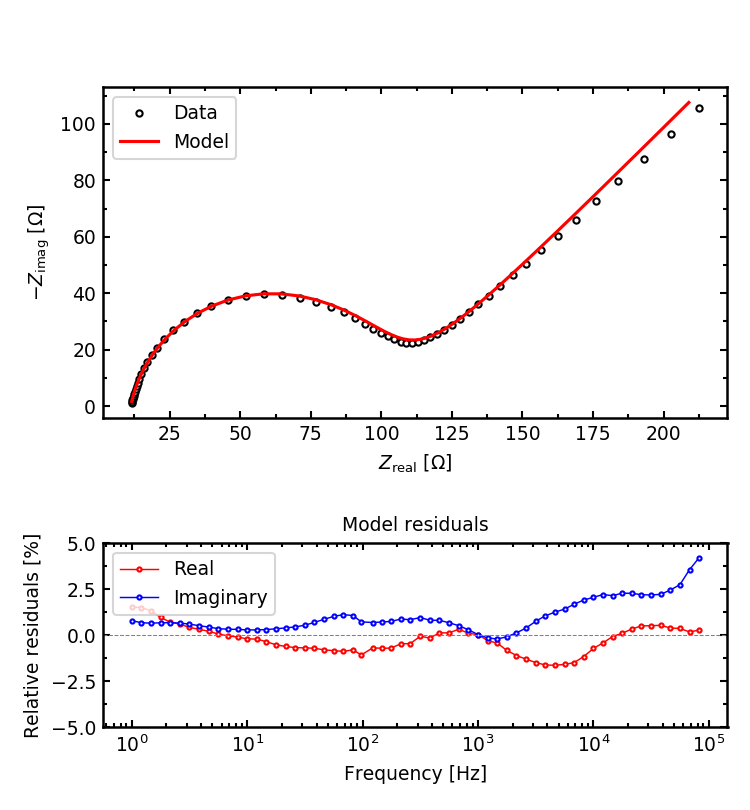

In [11]:
plot_imp_fit(Z, Z_fit, fig_width = 5, fig_height = 5.4, text_size = 9)

In [12]:
fname = "data/190508_002_100mM_K4FeCN6_100mM_K3FeCN6_50mLmin_PEIS_C01.mpt"
data = pd.read_csv(fname, sep="\t", skiprows = 63, encoding="latin1")

In [13]:
frequencies = np.array(data["freq/Hz"])
Z = np.array(data["Re(Z)/Ohm"] - 1j*data["-Im(Z)/Ohm"])

In [95]:
circuit = 'L0-R0-V0'
initial_guess=[1e-9, 0.22, 
               5, 0.5, 20, 0.1, 0.1, 7e-06, 6e-06, 0.33, 0.33, 298, 100, 0.005, 0.90, 0.05, 0.5]

In [96]:
l_bounds = [0, 0, 5*0.99995, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0]
u_bounds = [np.inf, np.inf, 5*1.00005, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 
            np.inf, np.inf, np.inf, np.inf, np.inf, 0.9995, np.inf, np.inf]
bounds=(l_bounds, u_bounds)

In [97]:
customCircuit = CustomCircuit(initial_guess=initial_guess, circuit=circuit, bounds=bounds)

In [98]:
customCircuit.fit(frequencies, Z)

print(customCircuit)


-------------------------------
Circuit: None
Circuit string: L0-R0-V0
Fit: True

-------------------------------
Fit parameters:
	L0 = 1.41e-07 +/- 1.18e-09
	R0 = 1.63e-01 +/- 5.39e-02
	V0_0 = 5.34e+00 +/- 2.49e-02
	V0_1 = 8.82e-01 +/- 2.24e-01
	V0_2 = 2.10e-02 +/- 7.64e-03
	V0_3 = 8.69e-02 +/- 3.72e-02
	V0_4 = 1.73e-07 +/- 2.37e-06
	V0_5 = 2.76e-01 +/- 1.59e-03
	V0_6 = 2.80e-01 +/- 2.19e+00
	V0_7 = 6.29e-01 +/- 1.77e+02
	V0_8 = 6.28e-01 +/- 1.78e+02
	V0_9 = 2.98e+02 +/- 5.73e-03
	V0_10 = 6.92e+01 +/- 2.28e-02
	V0_11 = 5.72e-03 +/- 8.11e-04
	V0_12 = 6.93e-01 +/- 4.83e-02
	V0_13 = 4.00e-01 +/- 1.58e+00
	V0_14 = 4.49e-01 +/- 4.00e+00



In [99]:
Z_fit = customCircuit.predict(frequencies)

<IPython.core.display.Javascript object>


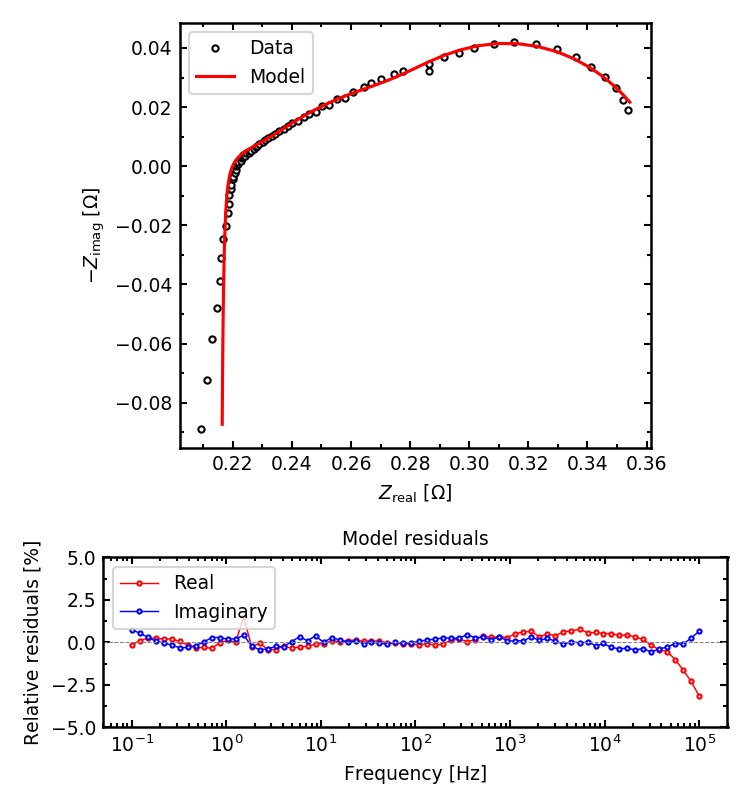

In [100]:
plot_imp_fit(Z, Z_fit, fig_width = 5, fig_height = 5.4, text_size = 9)